# **Faktor-Faktor yang Mempengaruhi Popularitas Produk Kecantikan di Platform Sephora**
----
Nama: Naisyla Auliya Rahmi Putri  
Kelas: B25  
NIM: 2509116078  

# **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#**Memuat Dataset**

In [ ]:
file = "/content/drive/MyDrive/product_info.csv"

df = pd.read_csv(file)

df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


#**Business Understanding**

##**Business Objective**

Dataset yang digunakan berisi 8.494 produk kecantikan dari platform Sephora dengan 27 kolom yang merepresentasikan karakteristik dan performa produk. Informasi yang tersedia meliputi identitas produk dan brand, harga, rating rata-rata pelanggan, jumlah review, jumlah loves sebagai indikator popularitas, kategori produk (primary, secondary, dan tertiary category), highlights, serta status ketersediaan produk.

Permasalahan bisnis yang ingin dianalisis adalah perbedaan tingkat popularitas antar produk di dalam platform. Tidak semua produk dengan rating tinggi atau harga tertentu memiliki tingkat popularitas yang sama. Hal ini menunjukkan bahwa terdapat kombinasi faktor tertentu yang memengaruhi minat dan preferensi konsumen terhadap suatu produk.

Tujuan analisis ini adalah untuk mengidentifikasi faktor-faktor utama yang berpengaruh terhadap popularitas produk, khususnya yang tercermin melalui jumlah loves. Hasil analisis diharapkan dapat memberikan insight bagi pengambilan keputusan strategis seperti penentuan harga, pengelompokan produk, serta optimalisasi strategi promosi berbasis data.

##**Assess Situation**

Dataset yang digunakan merupakan bagian product information dari dataset Sephora yang dikumpulkan. Dataset ini berisi informasi lebih dari 8.000 produk kecantikan yang mencakup nama produk, brand, rating, jumlah review, jumlah loves, kategori produk, serta berbagai fitur produk seperti highlights.

Berdasarkan kondisi dataset, terdapat beberapa tantangan yang perlu diperhatikan. Pertama, terdapat kemungkinan adanya missing values pada beberapa kolom tertentu seperti harga diskon atau informasi tambahan produk. Kedua, variabel dalam dataset memiliki tipe data yang beragam (numerik, kategorikal, dan teks), sehingga memerlukan proses pembersihan dan penyesuaian sebelum dianalisis. Ketiga, terdapat perbedaan skala antar variabel numerik seperti harga dan jumlah loves yang cukup besar, sehingga dapat memengaruhi interpretasi hasil analisis. Selain itu, beberapa kolom seperti highlights berbentuk teks semi-terstruktur yang memerlukan pemrosesan tambahan apabila ingin dianalisis lebih lanjut.

##**Analytic Goals**

Berdasarkan permasalahan bisnis yang telah diidentifikasi, tujuan analitik dari penelitian ini adalah untuk:

1. Menganalisis distribusi variabel utama seperti harga, rating, jumlah review, dan jumlah loves guna memahami karakteristik umum produk dalam dataset.
2. Mengidentifikasi hubungan antara variabel numerik (harga, rating, jumlah review) dengan jumlah loves sebagai indikator popularitas produk.
3. Membandingkan tingkat popularitas antar kategori dan brand untuk mengetahui apakah terdapat pola tertentu yang memengaruhi minat konsumen.
4. Menentukan faktor-faktor yang memiliki pengaruh paling signifikan terhadap popularitas produk berdasarkan hasil analisis eksploratif dan korelasi.

Hasil dari analisis ini diharapkan mampu memberikan pemahaman berbasis data mengenai faktor yang mendorong popularitas produk di platform e-commerce.

##**Project Plan**

Rencana pengerjaan proyek ini meliputi:

1. Memahami struktur dataset serta tipe data setiap variabel
2. Melakukan pembersihan data (menangani missing values dan inkonsistensi)
3. Melakukan eksplorasi data untuk melihat distribusi harga, rating, jumlah review, dan loves
4. Menganalisis hubungan antar variabel numerik serta perbandingan berdasarkan kategori dan brand
5. Menginterpretasikan hasil analisis untuk mengidentifikasi faktor yang memengaruhi popularitas produk dan menyusun insight bisnis

# **Data Understanding**

## **Memuat Dataset**

In [2]:
file = '/content/drive/MyDrive/product_info.csv'

df = pd.read_csv(file)

df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


## **Deskripsi Data**

### **Informasi Dasar**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 8494 Baris dan 27 Kolom

### **Informasi Lanjutan**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

1. product_id: Jumlah data:8.494 Tipe data: object Deskripsi:ID unik untuk setiap produk
2. product_name: Jumlah data: 8.494 Tipe data: object Deskripsi: Nama produk yang dijual
3. brand_id: Jumlah data: 8.494 Tipe data: object Deskripsi: Nama brand dari produk
4. brand_name: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Jumlah pengguna yang menyukai (favorite/love) produk tersebut.
5. loves_count: Jumlah data: 8.494 Tipe data: int64
Deskripsi: Jumlah pengguna yang menyukai (favorite/love) produk tersebut.
6. rating: Jumlah data: 8.216 Tipe data: float64 Deskripsi: Nilai rating rata-rata produk yang diberikan oleh pengguna.
7. reviews: Jumlah data: 8.216 Tipe data: float64 Deskripsi: Jumlah review yang diberikan oleh pengguna.
8. size: Jumlah data: 6.863 Tipe data: object Deskripsi: Ukuran atau volume produk.
9. variation_type: Jumlah data: 7.050 Tipe data: object Deskripsi: Jenis variasi produk (misalnya warna, ukuran, dll).
10. variation_value: Jumlah data: 6.896 Tipe data: object Deskripsi: Nilai variasi produk (contoh: shade tertentu).
11. variation_desc: Jumlah data: 1.250 Tipe data: object Deskripsi: Deskripsi tambahan terkait variasi produk.
12. ingredients: Jumlah data: 7.549 Tipe data: object Deskripsi: Daftar bahan kandungan produk.
13. price_usd: Jumlah data: 8.494 Tipe data: float64 Deskripsi: Harga utama produk dalam USD.
14. value_price_usd: Jumlah data: 451 Tipe data: float64 Deskripsi: Harga nilai (value price), biasanya untuk bundling atau ukuran khusus.
15. sale_price_usd: Jumlah data: 270 Tipe data: float64 Deskripsi: Harga diskon produk jika sedang promo.
16. limited_edition: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Penanda apakah produk edisi terbatas (1 = ya, 0 = tidak).
17. new: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Penanda apakah produk termasuk produk baru (1 = ya, 0 = tidak).
18. online_only: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Penanda apakah produk hanya tersedia secara online (1 = ya, 0 = tidak).
19. out_of_stock: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Penanda apakah produk sedang habis stok (1 = ya, 0 = tidak).
20. Sephora_exclusive: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Penanda apakah produk eksklusif dijual di Sephora (1 = ya, 0 = tidak).
21. highlights: Jumlah data: 6.287 Tipe data: object Deskripsi: Fitur unggulan atau klaim utama produk (misalnya vegan, cruelty-free, dll).
22. primary_category:
Jumlah data: 8.494 Tipe data: object Deskripsi: Kategori utama produk.
23. secondary_category: Jumlah data: 8.486 Tipe data: object Deskripsi: Sub-kategori dari kategori utama.
24. tertiary_category: Jumlah data: 7.504 Tipe data: object Deskripsi: Kategori tingkat ketiga (lebih spesifik).
25. child_count: Jumlah data: 8.494 Tipe data: int64 Deskripsi: Jumlah variasi turunan dari suatu produk.
26. child_max_price:
Jumlah data: 2.754 Tipe data: float64 Deskripsi: Harga maksimum dari variasi produk.
27. child_min_price: Jumlah data: 2.754
Tipe data: float64 Deskripsi: Harga minimum dari variasi produk.

### **Informasi Statistik Deskriptif**

In [5]:
df.describe(include='all')

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
count,8494,8494,8494.000000,8494,8.494000e+03,8216.000000,8216.000000,6863,7050,6896,...,8494.000000,8494.000000,8494.000000,6287,8494,8486,7504,8494.000000,2754.000000,2754.000000
unique,8494,8415,NaN,304,NaN,NaN,NaN,2055,7,2729,...,NaN,NaN,NaN,4417,9,41,118,NaN,NaN,NaN
top,P505461,Discovery Set,NaN,SEPHORA COLLECTION,NaN,NaN,NaN,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,NaN,NaN,NaN,"['Layerable Scent', 'Floral Scent']",Skincare,Women,Perfume,NaN,NaN,NaN
freq,1,3,NaN,352,NaN,NaN,NaN,500,4043,374,...,NaN,NaN,NaN,64,2420,875,568,NaN,NaN,NaN
mean,NaN,NaN,5422.440546,NaN,2.917957e+04,4.194513,448.545521,NaN,NaN,NaN,...,0.219096,0.073699,0.279374,NaN,NaN,NaN,NaN,1.631622,53.792023,39.665802
std,NaN,NaN,1709.595957,NaN,6.609212e+04,0.516694,1101.982529,NaN,NaN,NaN,...,0.413658,0.261296,0.448718,NaN,NaN,NaN,NaN,5.379470,58.765894,38.685720
min,NaN,NaN,1063.000000,NaN,0.000000e+00,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,3.000000
25%,NaN,NaN,5333.000000,NaN,3.758000e+03,3.981725,26.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,22.000000,19.000000
50%,NaN,NaN,6157.500000,NaN,9.880000e+03,4.289350,122.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,32.000000,28.000000
75%,NaN,NaN,6328.000000,NaN,2.684125e+04,4.530525,418.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,59.000000,42.000000


1. Count (Kelengkapan Data) Berdasarkan hasil dari statistik deskriptif, dataset terdiri dari 8.494 baris data dengan 27 kolom.
Beberapa kolom memiliki nilai yang tidak lengkap (missing values), yang dapat diidentifikasi melalui perbedaan antara total baris (8.494) dan nilai count masing-masing variabel.
*   rating dan reviews memiliki 8.216 data valid (missing 278 data).
*   size memiliki 6.863 data (missing 1.631 data).
*   variation_type berisi 7.050 data, sehingga terdapat 1.444 data yang hilang.
*   variation_value berisi 6.896 data, sehingga terdapat 1.598 data yang hilang.
*   highlights berisi 6.287 data, sehingga terdapat 2.207 data yang hilang.
*   secondary_category berisi 8.486 data, sehingga terdapat 8 data yang hilang.
*   tertiary_category berisi 7.504 data, sehingga terdapat 990 data yang hilang.
*   child_max_price berisi 2.754 data, sehingga terdapat 5.740 data yang hilang.
*  child_min_price berisi 2.754 data, sehingga terdapat 5.740 data yang hilang.

Kesimpulan: selain dari yang sudah ditulis diatas, kolom yang lain sudah memiliki data lengap yaitu dengan jumlah 8.494.

---

Statistik Deskriptif Variabel Numerik

1. Price (price_usd)

- Mean: 51,66
- Median: 35
- Standar Deviasi: 53,67
- Minimum: 3
- Maksimum: 1.900

Nilai rata-rata harga sebesar 51,66 menunjukkan bahwa secara umum produk berada pada rentang harga menengah. Namun median yang lebih rendah, yaitu 35, mengindikasikan bahwa sebagian besar produk sebenarnya memiliki harga di bawah nilai rata-rata tersebut. Standar deviasi yang cukup besar (53,67) menunjukkan variasi harga yang tinggi antar produk. Rentang harga yang sangat lebar, dari 3 hingga 1.900, menandakan adanya produk dengan harga sangat tinggi yang memengaruhi nilai rata-rata.

2. Loves Count

- Mean: 29.179
- Median: 9.880
- Standar Deviasi: 66.092,12
- Minimum: 0
- Maksimum: 1.401.068

Rata-rata jumlah likes sebesar 29.179 menunjukkan tingkat ketertarikan pengguna yang cukup tinggi secara umum. Namun median yang jauh lebih rendah dibandingkan mean mengindikasikan bahwa hanya sebagian kecil produk yang memiliki jumlah likes sangat besar. Standar deviasi yang sangat tinggi memperlihatkan bahwa penyebaran data tidak merata, sehingga terdapat perbedaan popularitas yang signifikan antar produk.

3. Rating

- Mean: 4,19
- Median: 4,29
- Standar Deviasi: 0,52
- Minimum: 1
- Maksimum: 5

Nilai rata-rata rating sebesar 4,19 menunjukkan bahwa mayoritas produk memiliki penilaian yang baik. Median yang sedikit lebih tinggi dari mean menunjukkan distribusi rating relatif stabil dan tidak terlalu dipengaruhi oleh nilai ekstrem. Standar deviasi yang kecil (0,52) menandakan bahwa variasi penilaian antar produk tidak terlalu besar dan sebagian besar rating berada di sekitar nilai 4.

4. Reviews

- Mean: 448
- Median: 122
- Standar Deviasi: 1.101,98
- Minimum: 1
- Maksimum: 21.281

Rata-rata jumlah review sebesar 448 menunjukkan bahwa produk dalam dataset memiliki tingkat partisipasi pengguna yang cukup baik. Namun median yang jauh lebih rendah menunjukkan bahwa sebagian besar produk memiliki jumlah ulasan yang relatif sedikit. Standar deviasi yang tinggi mengindikasikan adanya produk tertentu dengan jumlah review sangat besar yang menyebabkan distribusi data menjadi tidak merata.

5. Value Price (451 data tersedia)

- Mean: 91,17
- Median: 67
- Standar Deviasi: 79,20
- Minimum: 0
- Maksimum: 617

Nilai rata-rata value price lebih tinggi dibandingkan price_usd, yang menunjukkan bahwa produk dalam kategori ini umumnya memiliki harga lebih besar, kemungkinan berupa paket atau bundling produk. Standar deviasi yang tinggi menandakan variasi harga yang cukup besar dalam kategori ini.

6. Sale Price (270 data tersedia)

- Mean: 20,21
- Median: 14
- Standar Deviasi: 24,33
- Minimum: 1,75
- Maksimum: 320

Harga diskon memiliki rata-rata yang relatif rendah dibandingkan harga normal. Median yang lebih kecil dari mean menunjukkan adanya beberapa produk dengan diskon sangat tinggi. Standar deviasi yang cukup besar menunjukkan variasi potongan harga antar produk.

7. Child Count

- Mean: 1,63
- Median: 0
- Standar Deviasi: 5,38
- Minimum: 0
- Maksimum: 105

Rata-rata jumlah variasi produk sebesar 1,63 menunjukkan bahwa sebagian besar produk tidak memiliki banyak variasi. Median bernilai 0 mengindikasikan bahwa mayoritas produk tidak memiliki turunan atau varian tambahan. Namun nilai maksimum yang mencapai 105 menunjukkan adanya beberapa produk dengan variasi sangat banyak.

Kesimpulan:  
Berdasarkan hasil analisis terhadap 8.494 data produk, terlihat bahwa variasi terbesar terdapat pada harga, jumlah likes, dan jumlah review. Perbedaan yang cukup besar antara nilai rata-rata dan median pada beberapa variabel menunjukkan bahwa distribusi data tidak merata dan dipengaruhi oleh sejumlah produk dengan nilai yang sangat tinggi.

Sementara itu, variabel rating menunjukkan pola yang lebih stabil dengan rata-rata yang tinggi dan penyebaran yang kecil, sehingga dapat disimpulkan bahwa sebagian besar produk memiliki penilaian yang baik. Secara umum, dataset ini menunjukkan keberagaman pada aspek harga dan popularitas, namun relatif konsisten pada aspek kualitas berdasarkan rating.

## **Verifikasi Kualitas Data**

### **Data Type Check**

In [6]:
df.dtypes

,0
product_id,object
product_name,object
brand_id,int64
brand_name,object
loves_count,int64
rating,float64
reviews,float64
size,object
variation_type,object
variation_value,object


### **Incosistent Values**

In [7]:
print(df['product_id'].unique())

['P473671' 'P473668' 'P473662' ... 'P504428' 'P504448' 'P505461']


Kolom product_id menunjukkan bahwa setiap produk memiliki identitas unik dengan format yang konsisten. Pola penulisannya seragam dan tidak terlihat adanya variasi struktur atau duplikasi pada data yang ditampilkan. Hal ini menunjukkan bahwa kolom tersebut sudah tertata dengan baik dan dapat digunakan sebagai primary key dalam dataset.

In [8]:
print(df['product_name'].unique())

['Fragrance Discovery Set' 'La Habana Eau de Parfum'
 'Rainbow Bar Eau de Parfum' ... 'Mon Paris Eau de Parfum Gift Set'
 'Y Eau de Parfum Gift Set'
 'Candy Glaze Lip Gloss Stick Duo with Hyaluronic Acid']


Kolom product_name berisi nama produk yang cukup deskriptif dan beragam. Tidak terlihat adanya nilai kosong pada data yang ditampilkan. Namun demikian, tetap diperlukan pengecekan lebih lanjut untuk memastikan tidak terdapat duplikasi nama dengan perbedaan kecil seperti tambahan spasi atau variasi huruf kapital.

In [9]:
print(df['brand_name'].unique())

['19-69' '54 Thrones' 'ABBOTT' 'Acqua di Parma' 'adwoa beauty' 'AERIN'
 'Algenist' 'Alpha-H' 'alpyn beauty' 'ALTERNA Haircare' 'Ami Colé' 'amika'
 'Anastasia Beverly Hills' 'Aquis' 'Armani Beauty' 'Artist Couture'
 'Atelier Cologne' 'Augustinus Bader' 'Azzaro' 'bareMinerals' 'BeautyBio'
 'beautyblender' 'belif' 'Benefit Cosmetics' 'BERDOUES' 'Bio Ionic'
 'Biossance' 'Blinc' 'Bobbi Brown' 'Bon Parfumeur' 'BondiBoost'
 'Boy Smells' 'BREAD BEAUTY SUPPLY' 'Briogeo' 'Bumble and bumble'
 'BURBERRY' 'Buxom' 'By Rosie Jane' 'caliray' 'Calvin Klein' 'CANOPY'
 'Capri Blue' 'Carolina Herrera' 'Caudalie' 'CAY SKIN' 'Ceremonia'
 'CHANEL' 'Charlotte Tilbury' 'Chloé' 'Christian Louboutin'
 'Christophe Robin' 'Cinema Secrets' 'Clarins' 'CLEAN RESERVE' 'CLINIQUE'
 'COLOR WOW' 'Commodity' 'Community Sixty-Six' 'COOLA' 'Crown Affair'
 'Curlsmith' 'dae' 'DAMDAM' 'Dame' 'Danessa Myricks Beauty'
 'Deborah Lippmann' 'DedCool' 'DEREK LAM 10 CROSBY' 'DERMAFLASH'
 'Dermalogica' 'Dior' 'Dolce&Gabbana' 'DOMINIQUE

Pada kolom brand_name ditemukan adanya inkonsistensi dalam format kapitalisasi. Beberapa brand ditulis menggunakan huruf kapital seluruhnya, sementara sebagian lainnya menggunakan format huruf kapital di awal kata. Perbedaan ini termasuk dalam inkonsistensi format penulisan sehingga perlu dilakukan standarisasi agar data menjadi lebih seragam dan konsisten untuk keperluan analisis.

In [10]:
print(df['size'].unique())

[nan '3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL' ... '0.25 oz/ 7.5 ml' '2.6 oz'
 '.11 oz / 3.2 mL']


Kolom size menunjukkan adanya variasi format penulisan ukuran produk, seperti kombinasi satuan ounce (oz) dan mililiter (mL). Selain itu, terdapat nilai kosong (NaN) yang menandakan bahwa tidak semua produk memiliki informasi ukuran. Perbedaan format seperti “0.25 oz / 7.5 mL” dan “2 oz” selain itu ada juga penulisan "mL" dan "ml" menunjukkan bahwa data belum sepenuhnya distandarisasi, sehingga perlu normalisasi format satuan agar lebih konsisten untuk analisis.

In [11]:
print(df['variation_type'].unique())

[nan 'Size + Concentration + Formulation' 'Scent' 'Size' 'Color'
 'Size + Concentration' 'Type' 'Formulation']


Kolom variation_type menunjukkan bahwa penulisan kategori sudah konsisten dalam penggunaan huruf kapital (Title Case) dan tanda pemisah “+”. Tidak ditemukan perbedaan format kapitalisasi sehingga dari sisi gaya penulisan dapat dikatakan seragam. Namun, terdapat perbedaan pada struktur variasinya, di mana sebagian produk hanya memiliki satu jenis variasi seperti “Size” atau “Color”, sedangkan sebagian lainnya menggabungkan beberapa atribut dalam satu field seperti “Size + Concentration” atau “Size + Concentration + Formulation”. Hal ini menunjukkan adanya ketidaksamaan kompleksitas variasi antar produk, meskipun secara penulisan sudah konsisten.

In [12]:
print(df['variation_value'].unique())

[nan '3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL Eau de Parfum Spray' ...
 '0.25 oz/ 7.5 ml' '2.6 oz' '2 oz / 60 mL eau de parfum spray']


Kolom variation_value berisi detail nilai dari variasi produk, seperti ukuran lengkap dengan keterangan “Eau de Parfum Spray”. Terlihat adanya variasi kapitalisasi seperti “Eau de Parfum Spray” dan “eau de parfum spray” yang menunjukkan inkonsistensi dalam penggunaan kapital pada format teks. Selain itu, beberapa nilai menggabungkan ukuran dan tipe produk sehingga berpotensi menyebabkan redundansi atau dobel data.

In [13]:
print(df['variation_desc'].unique())

[nan 'rosy-brown' 'for rich skin with yellow undertones'
 'for rich to deep skin tones'
 'clear with golden light-reflective minerals'
 'for rich skin with red undertones' 'berry'
 'for grey hair with cool/ash undertones' 'brick red (ultra-matte)'
 'dusty mauve' 'cool desert sand' 'Bronzed, Summer, Tourmaline, Moonstone'
 'colorless' 'taupe based brown' 'translucent/clear'
 'highlight pale yellow'
 'full-strip synthetic lashes with iconic glamour and voluminous drama'
 'golden taupe' 'for blonde hair with warm/gold undertones'
 'pinky brown with a matte finish'
 'for light brown hair with warm/cool undertones'
 'medium skin with a warm yellow undertone' 'cool taupe'
 'nude taupe beige' 'light golden' 'light bright peach'
 'medium to tan skin with peach undertones'
 'pink based flesh tone/ iridescent beige'
 'fair to light with warm pink undertones' 'contour caramel latte' 'black'
 'for light/medium brown & silver hair' 'ivory' 'baby pink'
 'golden copper' 'coconut-vanilla' 'icy white g

Kolom variation_desc terlihat memiliki isi yang sangat beragam dan tidak seragam. Dari data yang muncul, ada yang hanya berupa nama warna seperti berry, cool taupe, atau black, tetapi ada juga yang berupa penjelasan panjang seperti untuk jenis kulit tertentu (for rich skin with yellow undertones, fair to light with warm pink undertones) bahkan sampai deskripsi produk seperti bulu mata sintetis dengan efek dramatis. Artinya, kolom ini tidak hanya menyimpan satu jenis informasi saja, melainkan campuran antara warna, target pengguna, undertone, dan deskripsi produk.


Kondisi ini menunjukkan adanya inkonsistensi struktur data karena satu kolom menampung beberapa tipe informasi sekaligus. Jika dibiarkan, hal ini bisa menyulitkan analisis lanjutan, misalnya saat ingin mengelompokkan produk berdasarkan warna saja atau berdasarkan jenis kulit saja. Idealnya, informasi seperti ini dipisahkan agar lebih terstruktur dan mudah dianalisis.

In [14]:
print(df['ingredients'].unique())

["['Capri Eau de Parfum:', 'Alcohol Denat. (SD Alcohol 39C), Parfum (Fragrance) D-Limonene, Linalool, Benzyl Salicylate, Ethylhexyl Methoxycinnamate, Butyl Methoxydibenzoylmethane, Ethylhexyl Salicylate, Benzl Benzoate, Citral, Geraniol, Eugenol, Benzyl Alcohol, Farnesol, Citronellol, Isoeugenol.', 'Invisible Post Eau de Parfum:', 'Alcohol Denat. (SD Alcohol 39C), Parfum (Fragrance) Ethylhexyl Methoxycinnamate, Ethylhexyl Salicylate, Butyl Methoxydibenzoylmethane, Benzyl Benzoate, Citral, Coumarin, Limonene, Alpha-Isomethyl Ionone, Linalool.', 'Kashbah Eau de Parfum:', 'Alcohol Denat. (SD Alcohol 39C), Parfum (Fragrance) Coumarin, Ethylhexyl Methoxycinnamate, Butyl Methoxydibenzoylmethane, Ethylhexyl Salicylate, D-Limonene, Eugenol, Linalool, Citronellol, Geraniol, Cinnamal, Citral.', 'L’Air Barbes Eau de Parfum:', 'Alcohol Denat. (SD Alcohol 39C), Parfum (Fragrance) Benzyl Salicylate, D-Limonene, Ethylhexyl Methoxycinnamate, Butyl Methoxydibenzoylmethane, Ethylhexyl Salicylate, Linalo

Kolom ingredients memiliki isi yang beragam dan tidak seragam. Sebagian data hanya berupa daftar bahan yang dipisahkan dengan koma, tetapi ada juga yang memuat beberapa varian produk dalam satu baris serta penggunaan tanda baca yang berbeda-beda.

Hal ini menunjukkan bahwa kolom tersebut tidak memiliki struktur yang konsisten dan mencampur beberapa format penulisan sekaligus. Akibatnya, informasi yang tersimpan di dalamnya menjadi kurang terstruktur dan tidak sepenuhnya seragam antar baris data.

In [15]:
print(df['highlights'].unique())

["['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']"
 "['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']"
 "['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']"
 ...
 "['Best for Oily, Combo, Normal Skin', 'Without Parabens', 'Without Mineral Oil', 'Matte Finish', 'Salicylic Acid']"
 "['Natural Finish', 'Without Mineral Oil', 'Without Parabens']"
 "['Hyaluronic Acid', 'High Shine Finish', 'Plumping', 'Hydrating', 'Medium Coverage']"]


Kolom highlights berisi daftar keunggulan produk dalam bentuk list, seperti jenis scent (Fresh, Woody), klaim bahan (Hyaluronic Acid, Salicylic Acid), hingga klaim manfaat (Hydrating, Matte Finish, Medium Coverage).

Isinya sangat beragam karena mencampur kategori parfum, skincare, dan makeup dalam satu kolom. Ini menunjukkan bahwa highlights menampung berbagai jenis informasi tergantung tipe produknya, sehingga variasinya cukup tinggi antar baris data.


In [16]:
print(df['primary_category'].unique())

['Fragrance' 'Bath & Body' 'Mini Size' 'Hair' 'Makeup' 'Skincare'
 'Tools & Brushes' 'Men' 'Gifts']


Kolom ini sudah ringkas dan cocok. Namun, terdapat pencampuran antara jenis produk (misalnya Skincare, Makeup) dan kategori administratif (seperti Mini Size, Gifts), yang berpotensi membingungkan saat analisis dan pengelompokan data.

In [17]:
print(df['secondary_category'].unique())

['Value & Gift Sets' 'Women' 'Body Moisturizers' 'Fragrance' 'Men'
 'Candles & Home Scents' 'Body Care' 'Hair Styling & Treatments'
 'Shampoo & Conditioner' 'Mini Size' 'Lip' 'Moisturizers' 'Treatments'
 'Eye Care' 'Lip Balms & Treatments' 'Sunscreen' 'Cleansers' 'Masks'
 'Skincare' 'Face' 'Eye' 'Cheek' 'Hair' 'Tools' 'Brushes & Applicators'
 'Makeup Palettes' 'Beauty Tools' 'Accessories' 'Makeup' 'Bath & Shower'
 'Wellness' 'High Tech Tools' 'Shop by Concern' nan 'Self Tanners'
 'Shaving' 'Hair Tools' 'Nail' 'Beauty Accessories' 'Beauty Supplements'
 'Other Needs' 'Bath & Body']


Kolom ini menunjukkan pencampuran berbagai dimensi data dalam satu level, mencakup jenis produk (Body Care), segmentasi (Men, Women), hingga kategori administratif (Value & Gift Sets). Kehadiran nilai nan serta tumpang tindih kategori (seperti munculnya kembali kategori Fragrance dan Skincare) mengindikasikan struktur taksonomi yang belum konsisten. Diperlukan standarisasi hierarki untuk menghindari bias pengelompokan dan memastikan akurasi pada tahap analisis data.

In [18]:
print(df['tertiary_category'].unique())

['Perfume Gift Sets' 'Perfume' 'Rollerballs & Travel Size'
 'Body Lotions & Body Oils' nan 'Cologne' 'Diffusers'
 'Deodorant & Antiperspirant' 'Candles' 'Hair Masks'
 'Leave-In Conditioner' 'Shampoo' 'Hair Oil' 'Hair Styling Products'
 'Scalp Treatments' 'Conditioner' 'Lip Balm & Treatment' 'Moisturizers'
 'Face Serums' 'Eye Creams & Treatments' 'Face Sunscreen'
 'Face Wash & Cleansers' 'Face Oils' 'Toners' 'Face Masks' 'Facial Peels'
 'Hand Cream & Foot Cream' 'Decollete & Neck Creams' 'Exfoliators'
 'Hair Spray' 'Hair Primers' 'Tinted Moisturizer' 'Mascara'
 'Setting Spray & Powder' 'Highlighter' 'Concealer' 'Eyebrow' 'Blush'
 'Face Sets' 'Dry Shampoo' 'Curling Irons' 'Brushes & Combs'
 'Hair Straighteners & Flat Irons' 'Hair Dryers' 'Eyeshadow' 'Lipstick'
 'Eye Palettes' 'Contour' 'Lip Gloss' 'Eye Brushes' 'Foundation'
 'False Eyelashes' 'Cheek Palettes' 'Lip Liner' 'Bronzer' 'Face Brushes'
 'Tweezers & Eyebrow Tools' 'Eye Sets' 'Eye Primer' 'Eyeliner'
 'Sharpeners' 'Accessories' 'L

Pada kolom ini isi data sudah lebih spesifik dan berfokus pada tipe produk yang jelas (misalnya Shampoo, Serum, Mascara, Face Masks), sehingga cocok untuk analisis yang lebih detail. Namun, masih terdapat nilai nan serta potensi overlap dengan secondary category (seperti Moisturizers atau Lip Balm & Treatments), yang menunjukkan struktur belum sepenuhnya bersih dan perlu penyelarasan agar tidak terjadi duplikasi level kategori saat analisis.


### **Missing Values**

In [19]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
product_id,0.000000
product_name,0.000000
brand_id,0.000000
brand_name,0.000000
loves_count,0.000000
rating,3.272899
reviews,3.272899
size,19.201789
variation_type,17.000235
variation_value,18.813280


Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:

- rating
memiliki missing values sekitar 3%, yang dimana ini cukup kecil indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani sesuai kebutuhan analisis.

- reviews
memiliki missing values sekitar 3%, yang dimana ini cukup kecil indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani sesuai kebutuhan analisis.

- size
memiliki missing values sekitar 19%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- variation_type
memiliki missing values sekitar 17%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- variation_value
memiliki missing values sekitar 18%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- variation_desc
memiliki missing values sekitar 85%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- ingredients
memiliki missing values sekitar 11%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- value_price_usd
memiliki missing values sekitar 94%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- sale_price_usd
memiliki missing values sekitar 96%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- highlights
memiliki missing values sekitar 26%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- secondary_category
memiliki missing values sekitar 0.09%, yang dimana ini sangat kecil namun perlu tetap di tangani atau di hapus.

- tertiary_category
memiliki missing values sekitar 11%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- child_max_price
memiliki missing values sekitar 67%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

- child_min_price
memiliki missing values sekitar 67%, yang dimana ini cukup besar indikasi hilangnya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

### **Duplicated Values**

In [20]:
df[df.duplicated()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price


Tidak ditemukan duplicate value pada dataset, sehingga dapat disimpulkan bahwa data sudah bersih dari duplikasi dan tidak memerlukan proses penghapusan data.

### **Outliers Values**

In [21]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
brand_id,16.788321
loves_count,11.196138
rating,3.991053
reviews,10.748764
price_usd,9.948199
value_price_usd,0.329644
sale_price_usd,0.129503
limited_edition,7.028491
new,7.169767
online_only,21.909583


Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset.

Terlihat pada kolom beberapa data yang memiliki outliner adalah:
- brand_id dengan persentase 16,8 %
- loves_count dengan persentase 11,2 %
- rating dengan persentase 3,9 %
- reviews dengan persentase 10,7 %
- price_usd dengan persentase 9,9 %
- value_price_usd dengan persentase 0,32 %
- sale_price_usd dengan persentase 0,12 %
- limited_edition dengan persentase 7,02 %
- new dengan persentase 7,16 %
- online_only dengan persentase 21,9 %
- out_of_stock dengan persentase 7,3 %
- child_count dengan persentase 12,9 %
- child_max_price dengan persentase 3,7 %
- child_min_price dengan persentase 3,8 %

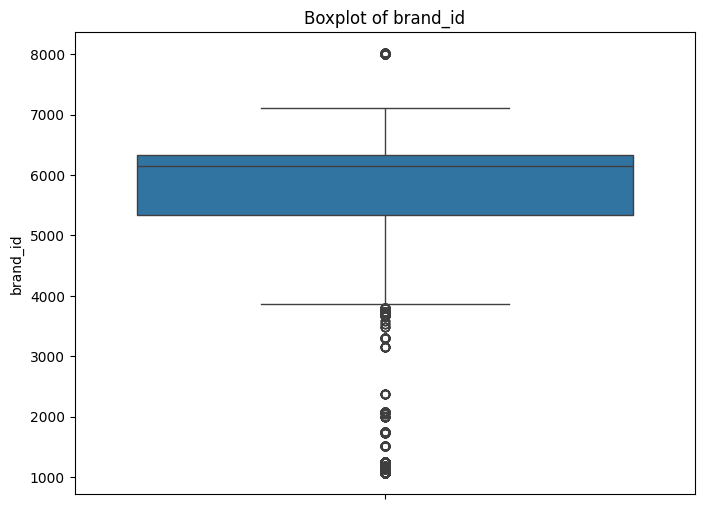

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['brand_id'])
plt.title('Boxplot of brand_id')
plt.ylabel('brand_id')
plt.show()

Berdasarkan boxplot, distribusi brand_id menunjukkan adanya beberapa outlier di nilai rendah dan tinggi, sementara sebagian besar data terkonsentrasi pada rentang tengah.

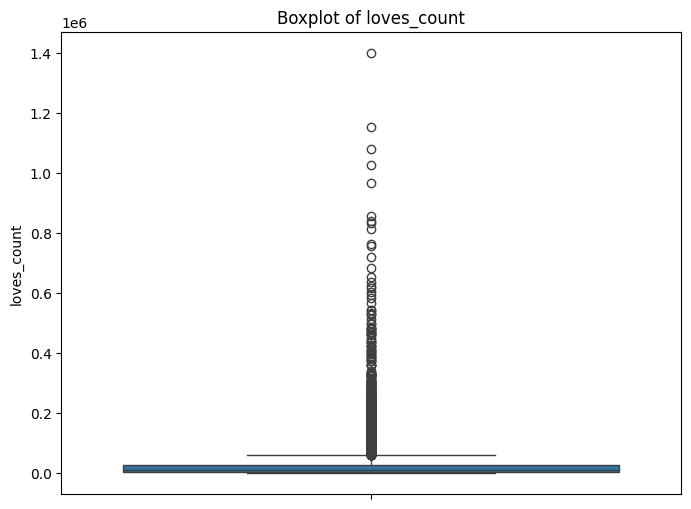

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['loves_count'])
plt.title('Boxplot of loves_count')
plt.ylabel('loves_count')
plt.show()

Sebaran data loves_count didominasi oleh nilai rendah dengan outlier signifikan di sisi atas, menandakan adanya ketimpangan popularitas yang tinggi antar produk.

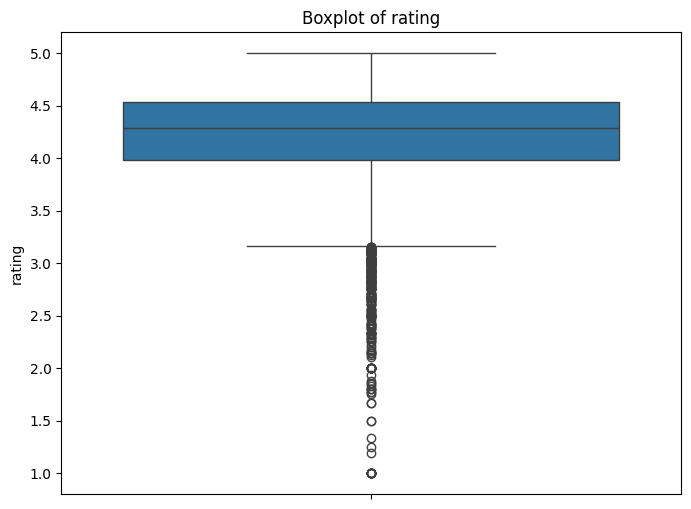

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['rating'])
plt.title('Boxplot of rating')
plt.ylabel('rating')
plt.show()

Terlihat pada boxplot, data terkonsentrasi tinggi, menunjukkan kepuasan konsumen yang stabil. Terdapat outlier pada nilai rendah, yang mencerminkan adanya produk dengan performa di bawah standar.

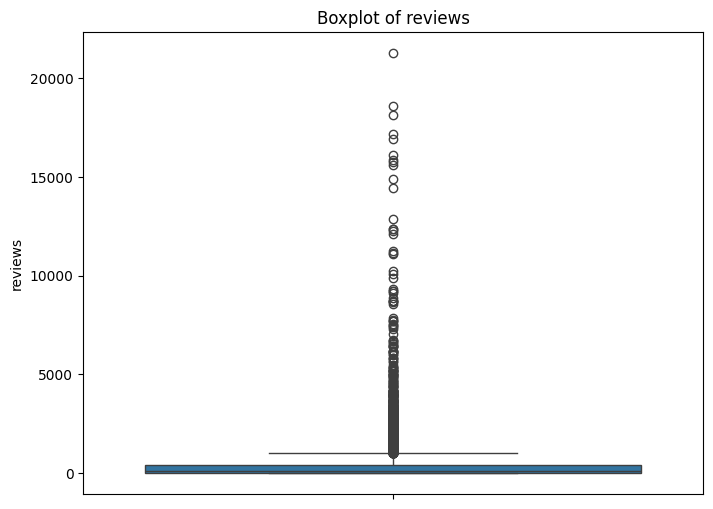

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['reviews'])
plt.title('Boxplot of reviews')
plt.ylabel('reviews')
plt.show()

Pada reviews menunjukkan pola long-tail, artinya hanya sedikit produk yang mendapatkan ulasan dalam jumlah sangat banyak, sementara sebagian besar produk lainnya hanya memiliki sedikit ulasan. Dengan kata lain, interaksi pengguna lebih banyak terfokus pada beberapa produk yang memang paling populer atau best-seller.

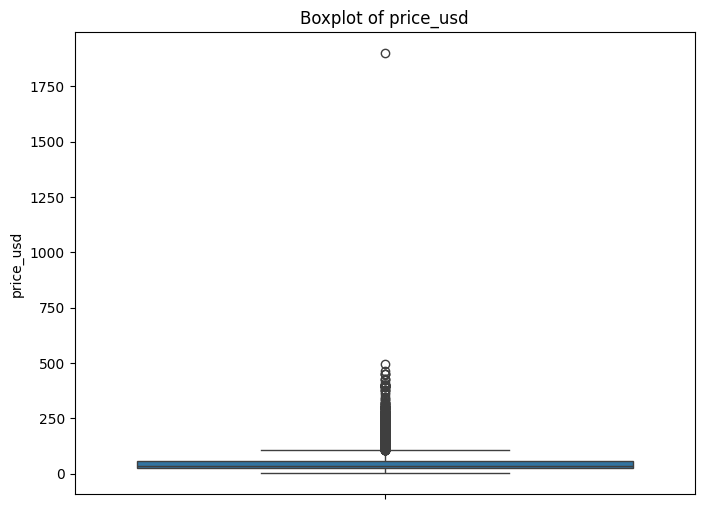

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price_usd'])
plt.title('Boxplot of price_usd')
plt.ylabel('price_usd')
plt.show()

Kalau dilihat dari distribusinya, sebagian besar produk dijual dengan harga yang masih cukup terjangkau. Tapi ada satu produk dengan harga yang jauh dari yang lain, hampir menyentuh 2.000 USD. Perbedaan ini cukup mencolok dan kemungkinan besar itu adalah produk luxury atau paket khusus yang memang dipasarkan di segmen harga yang sangat berbeda dibandingkan produk lainnya.

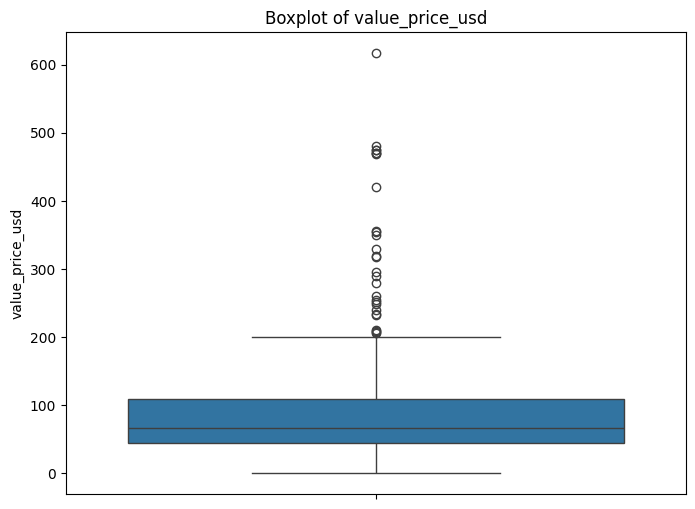

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['value_price_usd'])
plt.title('Boxplot of value_price_usd')
plt.ylabel('value_price_usd')
plt.show()

Sebagian besar produk dijual dengan harga yang masih tergolong terjangkau, yaitu di bawah 150 USD. Namun, ada beberapa produk dengan harga yang jauh lebih tinggi hingga sekitar 600 USD. Titik-titik di bagian atas grafik menunjukkan adanya produk dengan harga yang cukup mencolok dibandingkan rata-rata produk lainnya.

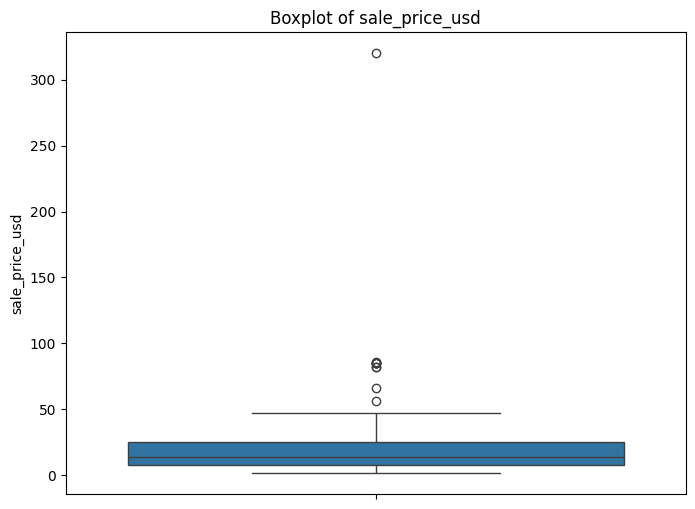

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['sale_price_usd'])
plt.title('Boxplot of sale_price_usd')
plt.ylabel('sale_price_usd')
plt.show()

Sebagian besar harga jual akhir produk masih tergolong terjangkau, namun terdapat satu produk dengan harga di atas 300 USD yang terlihat cukup mencolok dibandingkan yang lainnya.


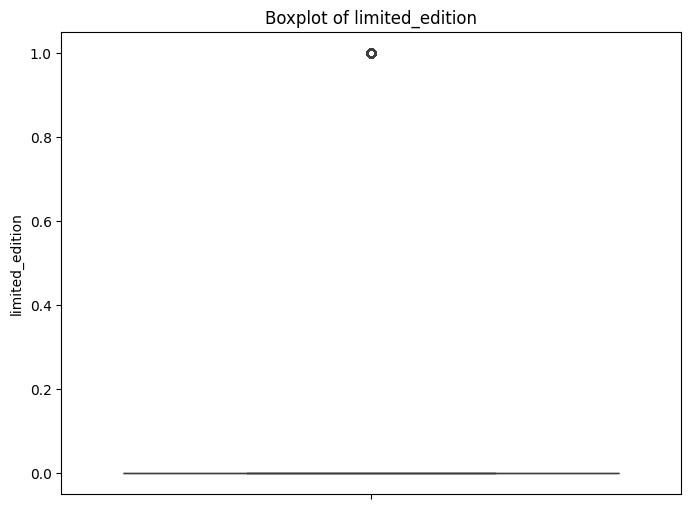

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['limited_edition'])
plt.title('Boxplot of limited_edition')
plt.ylabel('limited_edition')
plt.show()

Dari data terlihat bahwa hampir semua produk dalam koleksi ini merupakan barang reguler. Produk limited edition jumlahnya sangat sedikit, sehingga terlihat terpisah sendiri di grafik dan bisa dianggap sebagai outlier. Hal ini menunjukkan bahwa kategori Limited Edition memang sangat jarang muncul dalam dataset ini.

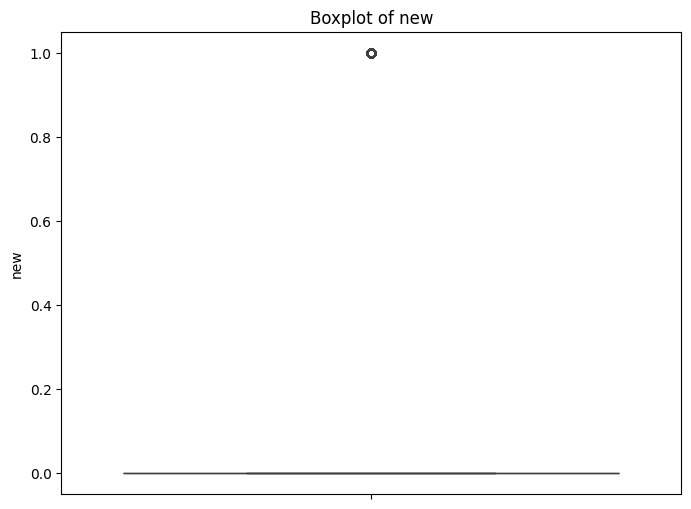

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['new'])
plt.title('Boxplot of new')
plt.ylabel('new')
plt.show()

Data menunjukkan bahwa stok barang didominasi oleh produk lama. Produk dengan status New jumlahnya sangat sedikit, sehingga terlihat mencolok sendiri dan bisa dianggap sebagai outlier dalam dataset.


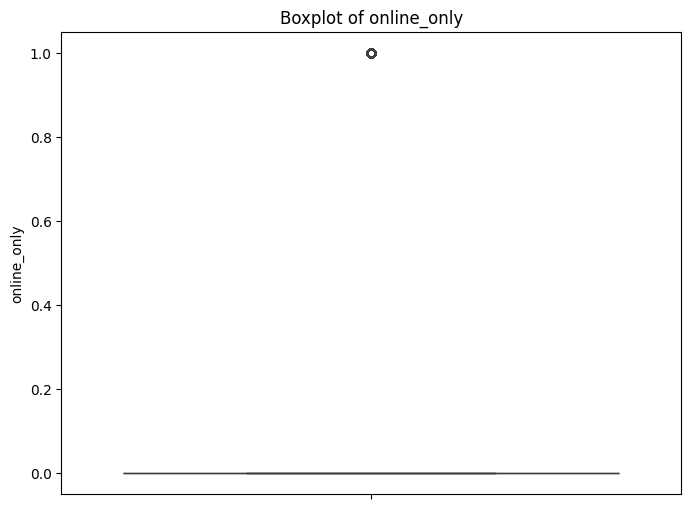

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['online_only'])
plt.title('Boxplot of online_only')
plt.ylabel('online_only')
plt.show()

Sebagian besar produk tersedia di toko fisik (bernilai 0). Produk yang berstatus “online_only” (bernilai 1) jumlahnya sangat sedikit, sehingga terlihat sebagai pengecualian atau outlier dalam dataset ini.

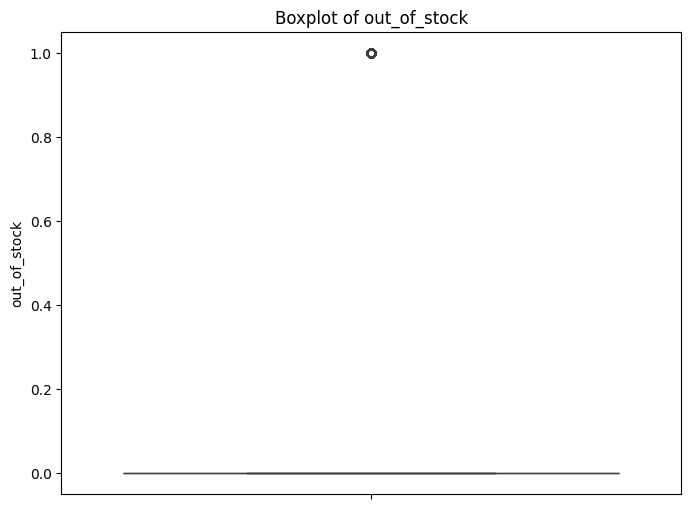

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['out_of_stock'])
plt.title('Boxplot of out_of_stock')
plt.ylabel('out_of_stock')
plt.show()

Sebagian besar produk masih tersedia atau memiliki stok. Produk yang berstatus “Habis” (bernilai 1) jumlahnya sangat sedikit, sehingga terlihat menonjol sendiri dan dapat dianggap sebagai outlier dalam data.

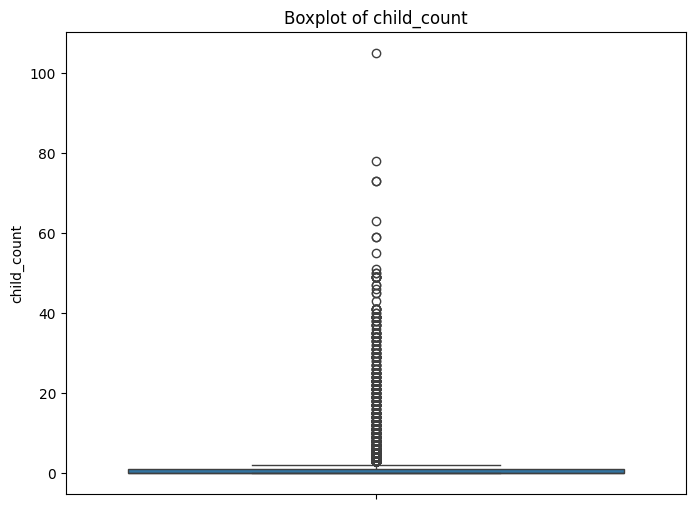

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['child_count'])
plt.title('Boxplot of child_count')
plt.ylabel('child_count')
plt.show()

Sebagian besar produk hanya memiliki sedikit varian atau bahkan hampir tidak memiliki varian sama sekali. Namun, terdapat beberapa produk yang jumlah variannya jauh lebih banyak dibandingkan yang lain, bahkan ada satu produk yang memiliki lebih dari 100 varian, sehingga terlihat sebagai outlier dalam data.


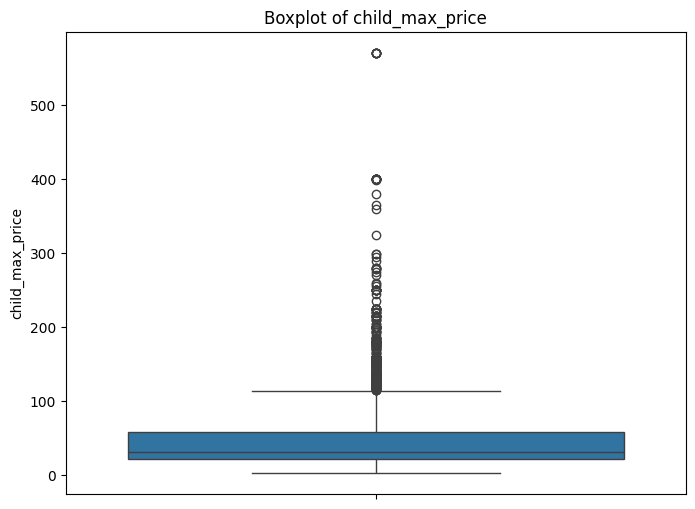

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['child_max_price'])
plt.title('Boxplot of child_max_price')
plt.ylabel('child_max_price')
plt.show()

Mayoritas produk memiliki harga varian tertinggi yang masih tergolong terjangkau (di bawah 100 USD), namun terdapat cukup banyak outlier dengan harga jauh lebih tinggi hingga 300–400 USD, bahkan ada satu varian yang hampir menyentuh 600 USD, yang menunjukkan adanya varian premium atau edisi khusus dengan segmen harga yang jauh di atas rata-rata.


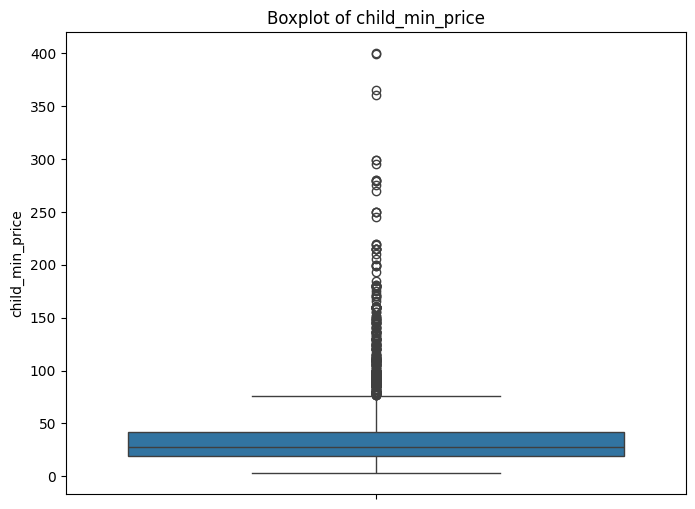

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['child_min_price'])
plt.title('Boxplot of child_min_price')
plt.ylabel('child_min_price')
plt.show()

Sebagian besar varian termurah dari suatu produk masih berada di bawah 50 USD, namun terdapat beberapa outlier di mana bahkan harga paling murahnya sudah tergolong tinggi, bahkan ada yang mencapai sekitar 400 USD.


# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

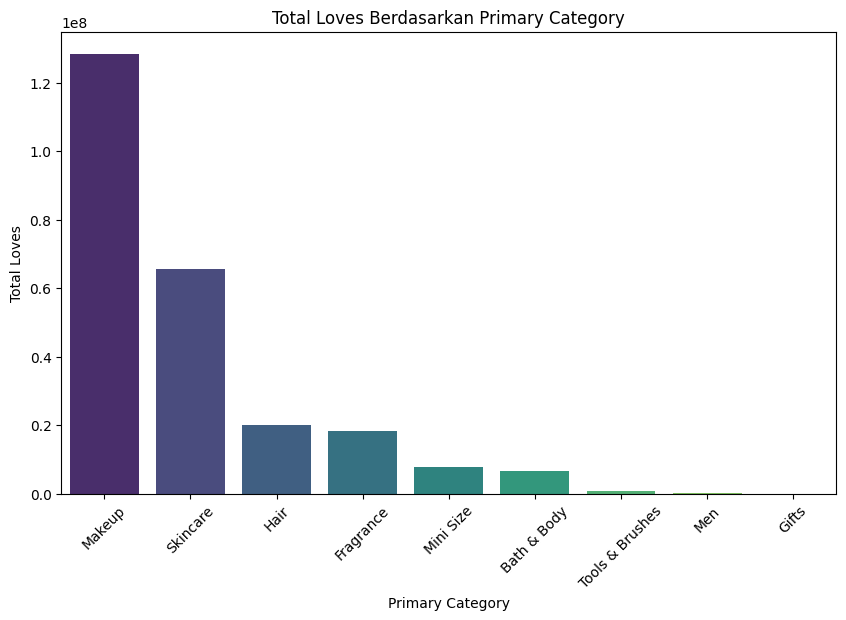

In [36]:
loves_kategori = df.groupby('primary_category')['loves_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=loves_kategori.index,
    y=loves_kategori.values,
    palette='viridis',
    hue=loves_kategori.index,
    legend=False
)

plt.title('Total Loves Berdasarkan Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Total Loves')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik, kategori Makeup memiliki total loves tertinggi dibanding kategori lainnya, menunjukkan bahwa produk makeup memiliki tingkat ketertarikan dan engagement paling besar dari pengguna. Di posisi kedua terdapat Skincare, yang juga menunjukkan minat tinggi namun masih berada cukup jauh di bawah Makeup.


Kategori seperti Hair dan Fragrance berada di tingkat menengah, sedangkan Mini Size, Bath & Body, Tools & Brushes, Men, dan Gifts memiliki total loves yang relatif rendah. Hal ini mengindikasikan bahwa fokus utama minat pengguna berada pada kategori Makeup dan Skincare, sehingga kedua kategori tersebut berpotensi menjadi kontributor utama dalam strategi promosi dan penjualan.

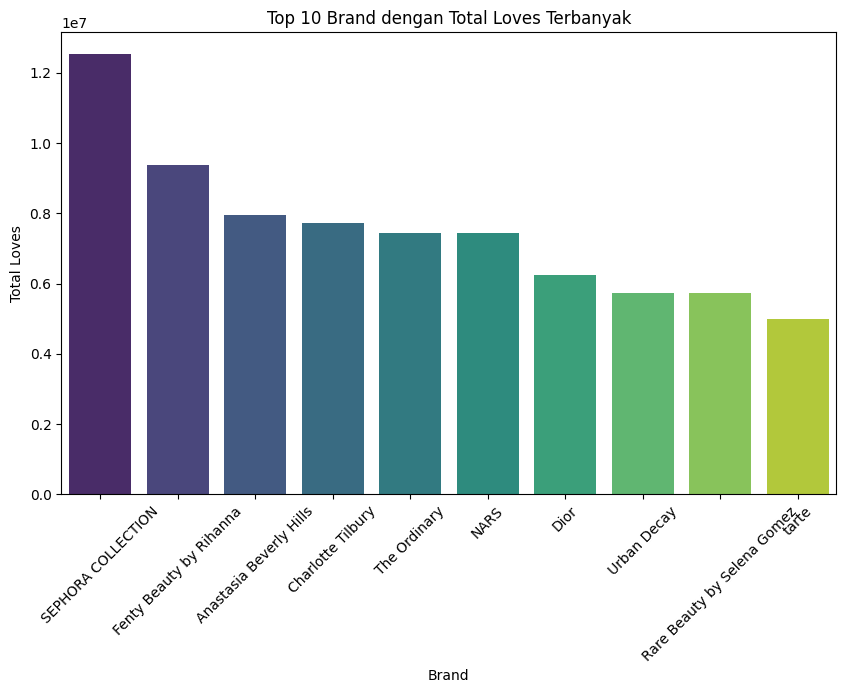

In [37]:
loves_brand = df.groupby('brand_name')['loves_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=loves_brand.index,
    y=loves_brand.values,
    palette='viridis',
    hue=loves_brand.index,
    legend=False
)

plt.title('Top 10 Brand dengan Total Loves Terbanyak')
plt.xlabel('Brand')
plt.ylabel('Total Loves')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik, SEPHORA COLLECTION menempati posisi pertama dengan total loves tertinggi, menunjukkan brand ini memiliki engagement paling kuat dibanding brand lainnya. Di posisi berikutnya terdapat Fenty Beauty by Rihanna, disusul Anastasia Beverly Hills, Charlotte Tilbury, dan The Ordinary, yang juga menunjukkan tingkat popularitas tinggi.


Brand seperti NARS, Dior, Urban Decay, dan Rare Beauty by Selena Gomez tetap berada dalam Top 10, namun dengan total loves yang lebih rendah dibanding pemimpin pasar.
Hal ini menunjukkan bahwa brand dengan positioning kuat, reputasi global, dan produk best-seller cenderung memiliki engagement pengguna yang lebih tinggi. Insight ini dapat dimanfaatkan untuk strategi promosi, kolaborasi brand, dan analisis dominasi pasar.

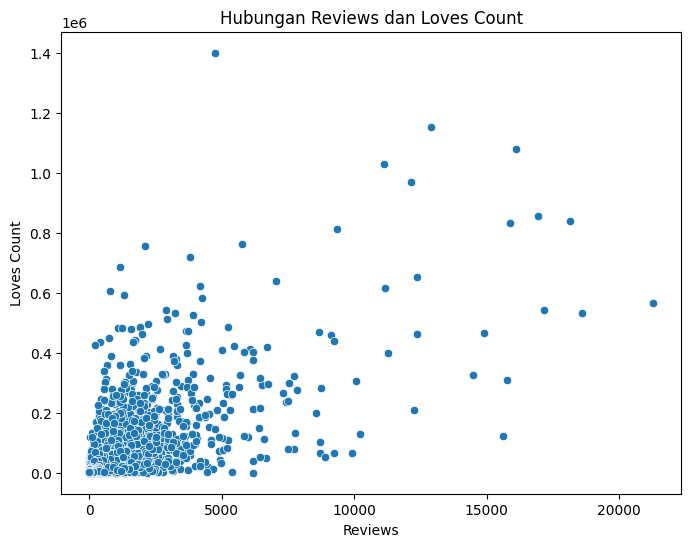

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='reviews', y='loves_count', data=df)

plt.title('Hubungan Reviews dan Loves Count')
plt.xlabel('Reviews')
plt.ylabel('Loves Count')
plt.show()

Berdasarkan scatter plot, terlihat adanya korelasi positif antara jumlah reviews dan loves_count. Produk dengan jumlah review yang lebih tinggi cenderung memiliki jumlah loves yang lebih besar.

Sebagian besar data terkonsentrasi pada area reviews rendah hingga menengah dengan loves yang juga relatif rendah, namun terdapat beberapa outlier dengan reviews dan loves yang sangat tinggi. Hal ini menunjukkan bahwa semakin tinggi interaksi pengguna dalam bentuk review, semakin tinggi pula tingkat ketertarikan (loves), meskipun distribusinya tidak sepenuhnya linear dan terdapat variasi yang cukup besar antar produk.

## **Composition/Komposisi**

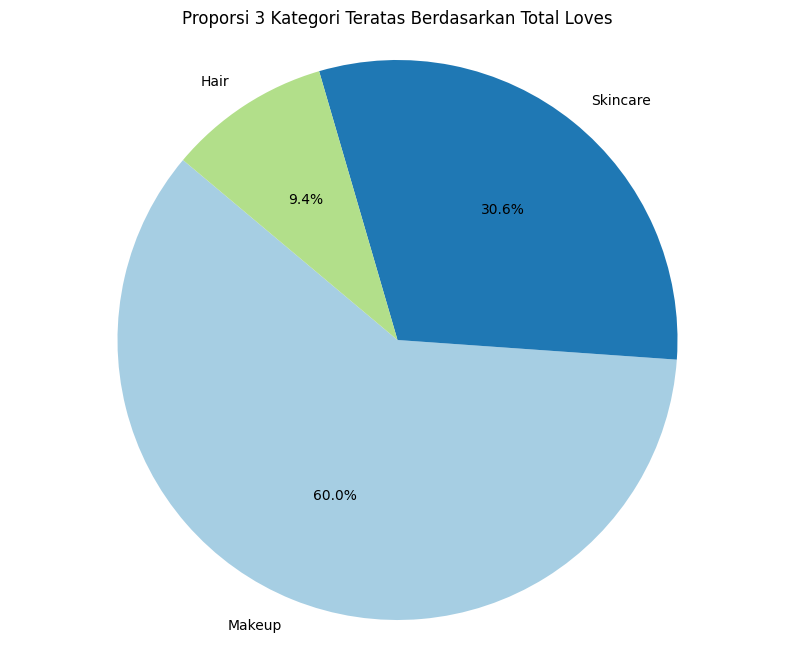

In [39]:
loves_by_category = df.groupby('primary_category')['loves_count'].sum().sort_values(ascending=False)
loves_top3 = loves_by_category.head(3)

plt.figure(figsize=(10, 8))
loves_top3.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Proporsi 3 Kategori Teratas Berdasarkan Total Loves')
plt.ylabel('')
plt.axis('equal')
plt.show()

Berdasarkan diagram pie, Makeup mendominasi dengan sekitar 60% dari total loves pada tiga kategori teratas. Hal ini menunjukkan bahwa minat dan engagement pengguna sangat terpusat pada kategori ini. Di posisi kedua terdapat Skincare dengan sekitar 30,6%, yang juga memiliki kontribusi besar namun masih jauh di bawah Makeup.

Sementara itu, Hair hanya menyumbang sekitar 9,4%, menunjukkan bahwa dibanding dua kategori lainnya, tingkat ketertarikan pengguna relatif lebih rendah. Secara keseluruhan, grafik ini menegaskan bahwa engagement pengguna sangat terkonsentrasi pada kategori Makeup, menjadikannya kategori paling dominan dalam dataset.

## **Distribution/Distribusi**

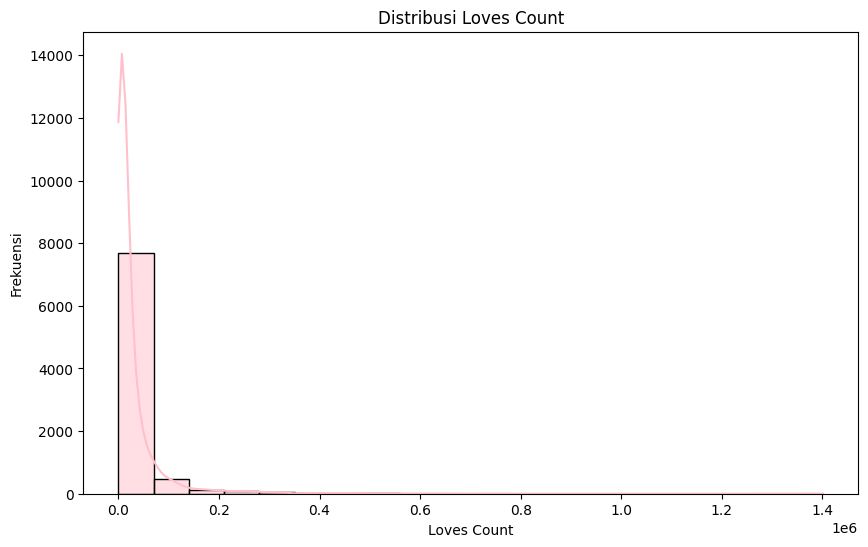

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loves_count'], bins=20, kde=True, color='pink')

plt.title('Distribusi Loves Count')
plt.xlabel('Loves Count')
plt.ylabel('Frekuensi')
plt.show()

Kalau dilihat dari gambar diatas, jumlah loves_count itu tidak tersebar merata dan cenderung miring ke kanan. Kebanyakan produk punya jumlah loves yang rendah, sementara hanya sedikit produk yang loves-nya sangat tinggi. Ini menunjukkan kalau popularitasnya timpang cuma beberapa produk yang benar-benar populer dan punya engagement tinggi, sedangkan sebagian besar lainnya biasa saja. Pola seperti ini sebenarnya wajar di e-commerce, karena biasanya memang hanya ada sedikit produk best-seller dan banyak produk dengan performa sedang sampai rendah.

## **Relationship/Hubungan**

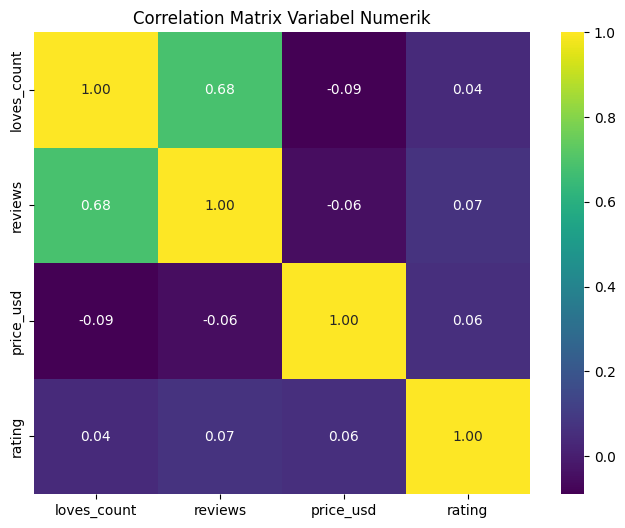

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['loves_count', 'reviews', 'price_usd', 'rating']].corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f'
)

plt.title('Correlation Matrix Variabel Numerik')
plt.show()

Berdasarkan correlation matrix, hubungan antar variabel dapat dijelaskan sebagai berikut:

- Hubungan antara loves_count dan reviews memiliki korelasi positif yang cukup kuat sebesar 0.68. Hal ini menunjukkan bahwa semakin banyak ulasan yang diterima suatu produk, semakin tinggi pula jumlah loves yang diperoleh. Engagement pengguna melalui reviews berkaitan erat dengan tingkat popularitas produk.

- Hubungan antara loves_count dan price_usd menunjukkan korelasi negatif yang sangat lemah (-0.09). Ini berarti harga tidak memiliki pengaruh yang signifikan terhadap jumlah loves. Produk dengan harga tinggi maupun rendah tidak menunjukkan perbedaan yang berarti dalam tingkat popularitas.

- Hubungan antara loves_count dan rating memiliki korelasi positif yang sangat lemah (0.04). Artinya, meskipun rating mencerminkan kualitas produk, nilai rating tidak secara langsung berkorelasi kuat dengan jumlah loves.

- Hubungan antara reviews dan price_usd juga menunjukkan korelasi negatif yang sangat lemah (-0.06), sehingga harga tidak berhubungan signifikan dengan banyaknya ulasan yang diberikan.

- Hubungan antara reviews dan rating memiliki korelasi positif yang sangat lemah (0.07), yang menunjukkan bahwa produk dengan rating tinggi belum tentu memiliki jumlah reviews yang tinggi.

- Terakhir, hubungan antara price_usd dan rating menunjukkan korelasi positif yang sangat lemah (0.06), sehingga harga tidak memiliki hubungan yang berarti dengan tinggi rendahnya rating.


Secara keseluruhan, hanya hubungan antara reviews dan loves_count yang menunjukkan korelasi cukup signifikan, sementara variabel lainnya memiliki hubungan yang lemah.


# **Menyimpan Dataset**

In [43]:
df.to_csv('/content/drive/MyDrive/product_info.csv.csv', index=False)